In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
# Charger le fichier CSV
df = pd.read_csv("dataset\StudentPerformanceFactors.csv")  # Remplace par le nom de ton fichier

# Supprimer les lignes vides
df = df.dropna()

# Afficher les premières lignes
print(df.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

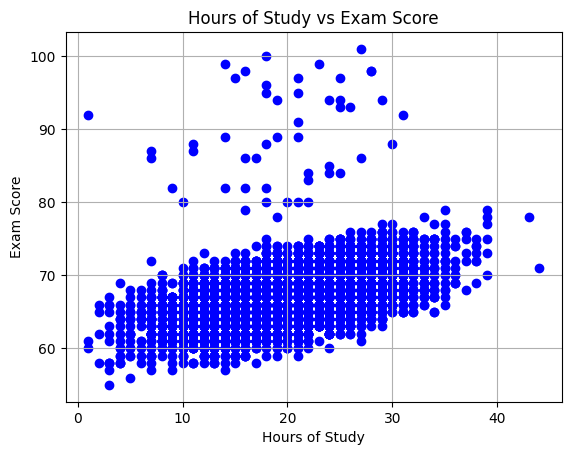

In [7]:
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='blue')
plt.xlabel("Hours of Study")
plt.ylabel("Exam Score")
plt.title("Hours of Study vs Exam Score")
plt.grid(True)
plt.show()

In [9]:
X = df[['Hours_Studied']]  # Feature
y = df['Exam_Score']   # Target

# Séparer en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Créer et entraîner le modèle
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prédire
y_pred_linear = linear_model.predict(X_test)

# Évaluer
print("Régression Linéaire :")
print("R² :", r2_score(y_test, y_pred_linear))
print("MAE :", mean_absolute_error(y_test, y_pred_linear))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_linear)))

Régression Linéaire :
R² : 0.20513060832466712
MAE : 2.5292420695261244
RMSE : 3.5145033503249836


In [11]:
# Transformer les données
poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Créer et entraîner le modèle
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Prédire
y_pred_poly = poly_model.predict(X_poly_test)

# Évaluer
print("\nRégression Polynomiale (degré 2) :")
print("R² :", r2_score(y_test, y_pred_poly))
print("MAE :", mean_absolute_error(y_test, y_pred_poly))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_poly)))


Régression Polynomiale (degré 2) :
R² : 0.2018202603373288
MAE : 2.5335990523806533
RMSE : 3.5218140741158916


c:\Users\rania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\rania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


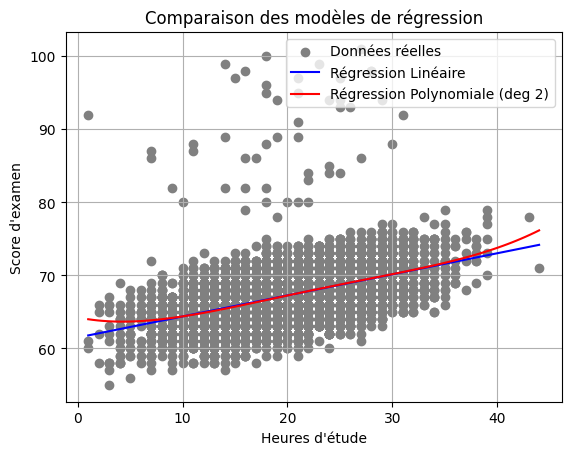

In [12]:
# Visualisation
plt.scatter(X, y, color='gray', label='Données réelles')

# Ligne linéaire
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_linear = linear_model.predict(X_range)
plt.plot(X_range, y_range_linear, color='blue', label='Régression Linéaire')

# Courbe polynomiale
X_range_poly = poly.transform(X_range)
y_range_poly = poly_model.predict(X_range_poly)
plt.plot(X_range, y_range_poly, color='red', label='Régression Polynomiale (deg 2)')

plt.xlabel("Heures d'étude")
plt.ylabel("Score d'examen")
plt.title("Comparaison des modèles de régression")
plt.legend()
plt.grid(True)
plt.show()

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6378.000000  6378.000000  6378.000000      6378.000000   
mean       19.977109    80.020853     7.034964        75.066165   
std         5.985460    11.550723     1.468033        14.400389   
min         1.000000    60.000000     4.000000        50.000000   
25%        16.000000    70.000000     6.000000        63.000000   
50%        20.000000    80.000000     7.000000        75.000000   
75%        24.000000    90.000000     8.000000        88.000000   
max        44.000000   100.000000    10.000000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6378.000000        6378.000000  6378.000000  
mean            1.495296           2.972719    67.252117  
std             1.233984           1.028926     3.914217  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

In [13]:
df = df[df['Exam_Score'] <= 100]

In [14]:
print(df['Exam_Score'].max())

100


In [15]:

X= df[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Sleep_Hours']]
y= df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prédire
y_pred_linear = linear_model.predict(X_test)

# Évaluer
print("Régression Linéaire :")
print("R² :", r2_score(y_test, y_pred_linear))
print("MAE :", mean_absolute_error(y_test, y_pred_linear))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_linear)))

Régression Linéaire :
R² : 0.5804961444923952
MAE : 1.416134100890546
RMSE : 2.5625664139799054


In [17]:
import pickle

# Enregistrer le modèle
with open("linear_model.pkl", "wb") as f:
    pickle.dump(linear_model, f)


In [ ]:
# Charger le modèle
with open("linear_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Tester une prédiction
y_pred = loaded_model.predict(X_test)
print(y_pred)
loaded_model.predict([[15,40,60,5]])


[68.42751387 66.81680287 64.49766797 ... 66.84901102 72.58662931
 70.14626736]


In [27]:
print(loaded_model.predict([[13, 10, 10, 4]]))  # Exemple de prédiction

[48.7488336]


c:\Users\rania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
